In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
#readind the dataset
dataset =pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
dataset.shape

(5110, 12)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
dataset.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
dataset.drop('id',axis=1,inplace=True)

In [ ]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
dataset.shape

(5110, 11)

In [ ]:
dataset.duplicated().any()

False

In [ ]:
dataset.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [ ]:
dataset['bmi']=dataset['bmi'].fillna(dataset['bmi'].mode()[0])

In [ ]:
dataset.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


<Axes: xlabel='count', ylabel='Residence_type'>

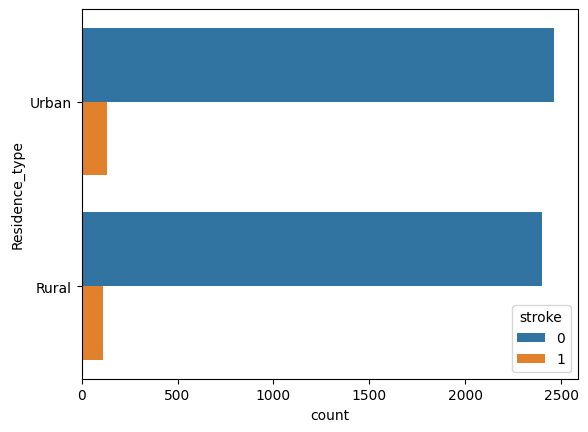

In [ ]:
sns.countplot(y='Residence_type',hue ='stroke',data=dataset)

<Axes: xlabel='count', ylabel='gender'>

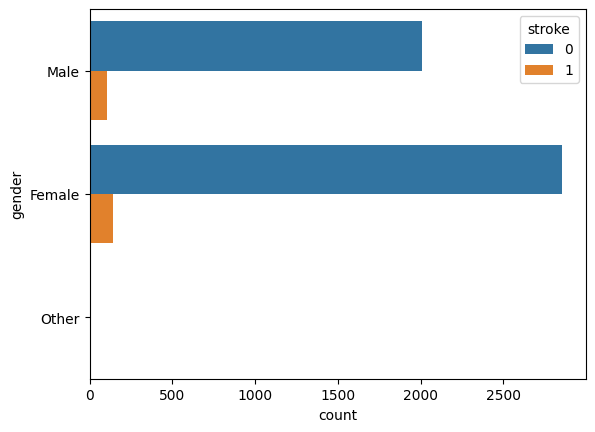

In [ ]:
sns.countplot(y='gender',hue ='stroke',data=dataset)

<Axes: xlabel='count', ylabel='work_type'>

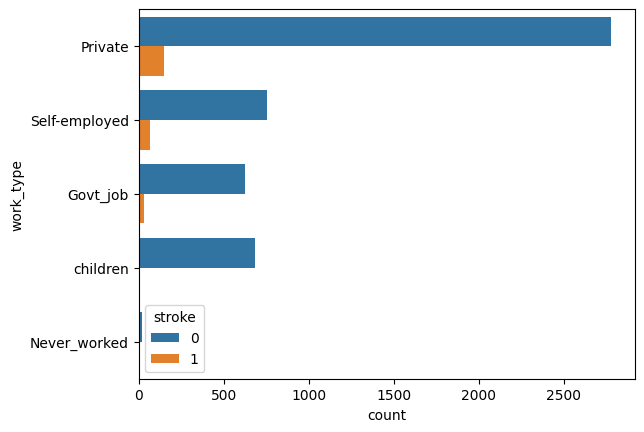

In [ ]:
sns.countplot(y='work_type',hue ='stroke',data=dataset)

<Axes: xlabel='count', ylabel='smoking_status'>

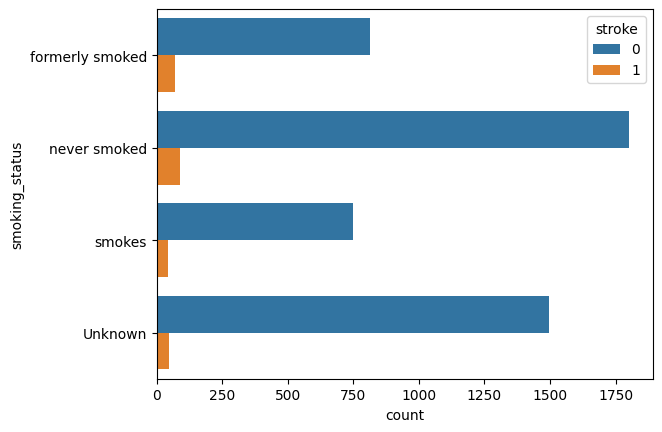

In [ ]:
sns.countplot(y='smoking_status',hue ='stroke',data=dataset)

<Axes: xlabel='count', ylabel='heart_disease'>

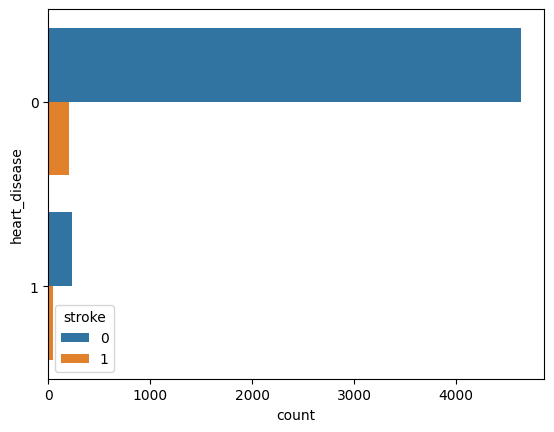

In [ ]:
sns.countplot(y='heart_disease',hue ='stroke',data=dataset)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['gender']=le.fit_transform(dataset['gender'])
dataset['ever_married']=le.fit_transform(dataset["ever_married"])
dataset['work_type']=le.fit_transform(dataset["work_type"])
dataset['Residence_type']=le.fit_transform(dataset["Residence_type"])
dataset['smoking_status']=le.fit_transform(dataset["smoking_status"])

In [ ]:
dataset.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002511,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,0.001092,0.003622,0.014074,0.006388
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026316,-0.062581,0.008929
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325553,0.265199,0.245257
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.159733,0.111038,0.127904
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038417,0.048460,0.134914
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335524,0.259647,0.108340
work_type,-0.015757,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299392,-0.305927,-0.032316
Residence_type,-0.001403,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000158,0.008237,0.015458
avg_glucose_level,0.001092,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168301,0.063437,0.131945
bmi,0.003622,-0.026316,0.325553,0.159733,0.038417,0.335524,-0.299392,-0.000158,0.168301,1.000000,0.219112,0.038257


In [ ]:
#to set the target and feature variable
x=dataset.drop('stroke',axis=1)
y=dataset['stroke']

In [ ]:
#splitting training and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21,stratify=y)

In [ ]:
#from sk learn importing model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#predicting the model
prediction_knn = knn.predict(x_test)
print("prediction for test set :{}".format(prediction_knn))

prediction for test set :[0 0 0 ... 0 0 0]


In [ ]:
#testing the accuracy of the dataset
print('Score for the training set: {:.2f}'.format(knn.score(x_train, y_train)*100))
print('Score for the test set: {:.2f}'.format(knn.score(x_test, y_test)*100))
print('Acurracy of the model:{:.2f}'.format(accuracy_score(y_test,prediction_knn)*100))

Score for the training set: 95.21
Score for the test set: 95.11
Acurracy of the model:95.11


In [ ]:
diff_knn=pd.DataFrame({'Actual Value':y_test,'Predicted Value':prediction_knn})
diff_knn

,Actual Value,Predicted Value
3211,0,0
2531,0,0
332,0,0
440,0,0
236,1,0
...,...,...
3120,0,0
3950,0,0
2169,0,0
506,0,0


In [ ]:

con_mat=confusion_matrix(y_test,prediction_knn)
print(con_mat)

[[971   1]
 [ 49   1]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.50      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.73      0.51      0.51      1022
weighted avg       0.93      0.95      0.93      1022



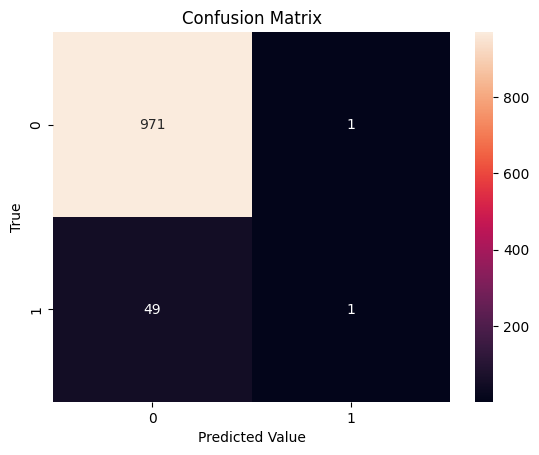

In [ ]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("True")
print(classification_report(y_test,prediction_knn))